In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to analyze
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
}


In [5]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="r2", 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        n_jobs=-1
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, "o-", label="Training R²")
    plt.plot(train_sizes, test_scores_mean, "o-", label="Validation R²")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("R² Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Base Linear Regression
lin_reg = LinearRegression()

# Best models (reuse tuned ones from Day 34)
ridge_best = Ridge(alpha=1.0)       # replace 1.0 with your tuned alpha if different
lasso_best = Lasso(alpha=0.1, max_iter=10000)  # replace 0.1 with tuned alpha if different
elastic_best = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)  # adjust if tuned differently

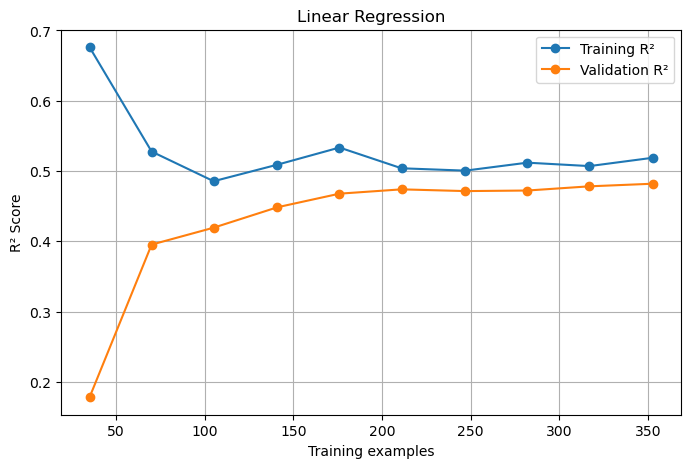

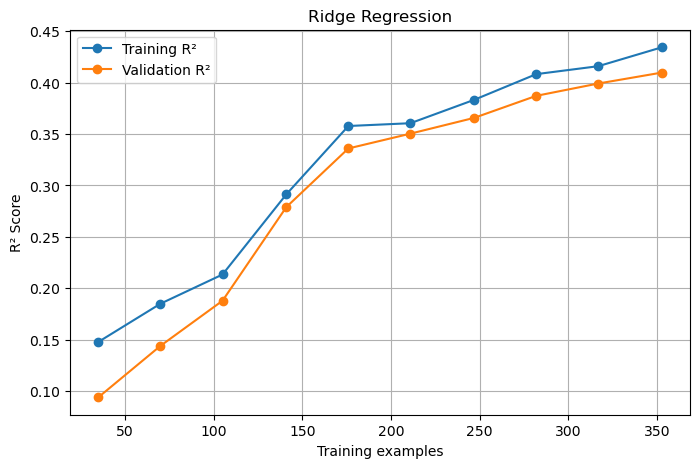

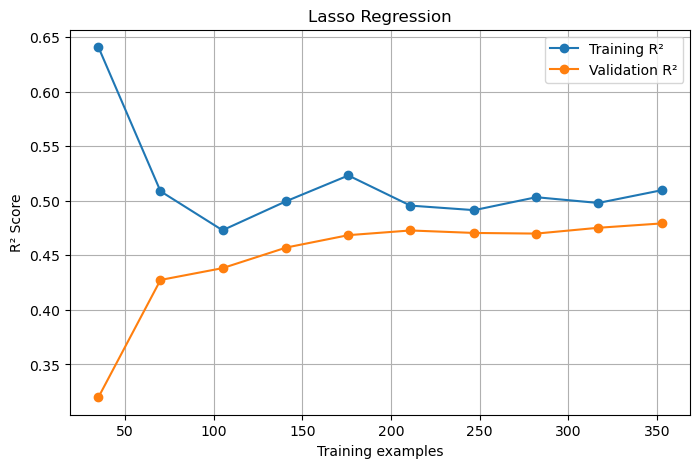

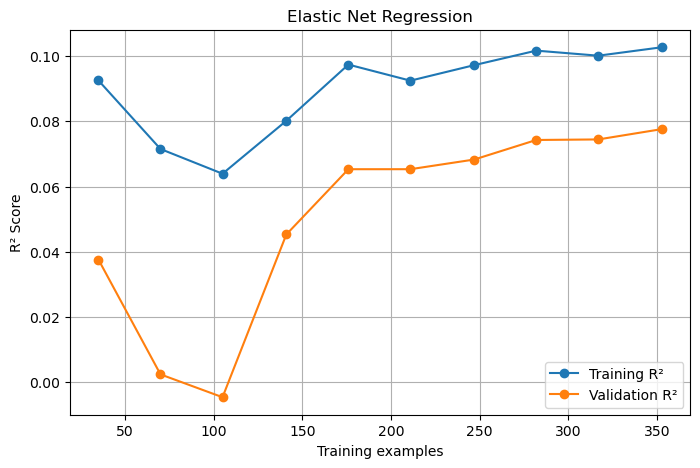

In [11]:
# Generate learning curves for all models
plot_learning_curve(lin_reg, X, y, "Linear Regression")
plot_learning_curve(ridge_best, X, y, "Ridge Regression")
plot_learning_curve(lasso_best, X, y, "Lasso Regression")
plot_learning_curve(elastic_best, X, y, "Elastic Net Regression")